<h1>U.S. Sheriff Political Clustering<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Source" data-toc-modified-id="Data-Source-1">Data Source</a></span></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-2">Cleaning</a></span><ul class="toc-item"><li><span><a href="#Dropping-Columns" data-toc-modified-id="Dropping-Columns-2.1">Dropping Columns</a></span></li><li><span><a href="#Nulls" data-toc-modified-id="Nulls-2.2">Nulls</a></span></li></ul></li><li><span><a href="#Merge" data-toc-modified-id="Merge-3">Merge</a></span></li><li><span><a href="#Sheriff-Demographics" data-toc-modified-id="Sheriff-Demographics-4">Sheriff Demographics</a></span><ul class="toc-item"><li><span><a href="#&quot;Official-Party&quot;" data-toc-modified-id="&quot;Official-Party&quot;-4.1">"Official Party"</a></span></li><li><span><a href="#Race-of-Sheriff" data-toc-modified-id="Race-of-Sheriff-4.2">Race of Sheriff</a></span></li><li><span><a href="#Gender-of-Sheriff" data-toc-modified-id="Gender-of-Sheriff-4.3">Gender of Sheriff</a></span></li></ul></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-5">Feature selection</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-6">Correlation</a></span></li><li><span><a href="#Drawing-the-results" data-toc-modified-id="Drawing-the-results-7">Drawing the results</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-7.1">PCA</a></span></li><li><span><a href="#UMAP" data-toc-modified-id="UMAP-7.2">UMAP</a></span></li><li><span><a href="#T-SNE" data-toc-modified-id="T-SNE-7.3">T-SNE</a></span></li></ul></li><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-8">K-Means Clustering</a></span><ul class="toc-item"><li><span><a href="#Interpreting-Score-of-K-Means" data-toc-modified-id="Interpreting-Score-of-K-Means-8.1">Interpreting Score of K-Means</a></span></li></ul></li><li><span><a href="#DBScan" data-toc-modified-id="DBScan-9">DBScan</a></span><ul class="toc-item"><li><span><a href="#Y---Crosstab" data-toc-modified-id="Y---Crosstab-9.1">Y - Crosstab</a></span></li><li><span><a href="#Analyzing-Clusters" data-toc-modified-id="Analyzing-Clusters-9.2">Analyzing Clusters</a></span></li></ul></li><li><span><a href="#Winsorize-Features" data-toc-modified-id="Winsorize-Features-10">Winsorize Features</a></span><ul class="toc-item"><li><span><a href="#Y-Crosstab" data-toc-modified-id="Y-Crosstab-10.1">Y-Crosstab</a></span></li></ul></li><li><span><a href="#Heirarchical-Clustering" data-toc-modified-id="Heirarchical-Clustering-11">Heirarchical Clustering</a></span></li></ul></div>

In [1]:
import pandas as pd
import requests, zipfile
import xml.etree.ElementTree as et
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import umap
from sklearn.cluster import DBSCAN
from sklearn import metrics
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import umap
from sklearn.cluster import DBSCAN
from sklearn import metrics
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
!ls

CPI-2020-07.xlsx
GeocodeResults.csv
Prosecutor-Elected-Officials-2019.xlsx
Sheriffs-Report-Data.xlsx
US Border Crossings.ipynb
Untitled.ipynb
bacon_CPI_estimator.ipynb
census_2018.csv
f9c49aed-ba4b-454e-b88a-cbe1fff5b2b6.xml
heart_disease-unsupervised.ipynb
iris-unsupervised
medium_articles.ipynb
medium_data.csv
mexican_border
occurrence_0.csv
state-codes.csv
tl_2018_us_county.csv


## Data Source

This dataset comes from the Reflective Democracy Campaign, a nonprofit that "investigates and the demographics of power in the United States. The data helps to prove that white male 'electability' is a myth, and that voters want women of all races and men of color to represent them. Their research shines a light on both the recent waves of victories by candidates who reflect the American people, and the structural barriers that still prevent a fair distribution of political power."


The Reflective Democracy Campaign and the Center for Technology and Civic Life have partnered to produce datasets examining the demographics of 3,000+ elected sheriffs; 2,800+ elected prosecutors; and candidates for federal, state, and local offices in 2012, 2014, 2016, and 2018.


This particular dataset examines sheriffs in 2,300 counties and other jurisdictions in the US in 2018. Findings show that there are very few jurisdictions with Hispanic, Asian, or black sheriffs. There are also very few women who hold the title. The data is merged with US Census Bureau estimates for 2018 for a more complete demographic picture.


This data comes from https://wholeads.us/ and https://console.cloud.google.com/marketplace/product/united-states-census-bureau/us-census-data?filter=solution-type:dataset&q=census&id=2c089839-2b4a-477a-962b-4a8b730d0a12

In [3]:
df = pd.read_excel('https://storage.googleapis.com/county-data-capstone/Sheriffs-Report-Data.xlsx', encoding="latin-1", error_bad_lines=False, index_col=False, dtype='unicode')
# read in numeric data
df2 = pd.read_csv('census_2018.csv')
df3 = pd.read_csv('tl_2018_us_county.csv')
df4 = pd.read_csv('state-codes.csv')

In [4]:
df3 = df3[['GEOID', 'NAMELSAD', 'STATEFP']]

In [5]:
df4.head()

,Name,Alpha code,Numeric code
0,Alabama,AL,1
1,Alaska,AK,2
2,American Samoa,AS,60
3,American Samoa *,NaN,3
4,Arizona,AZ,4


In [6]:
df.head()

,RDIndex2019,State,Office Level,OCDID,Electoral District,Urban/ Rural,Office Name,Official Name,Official Party,Party Roll Up,White/Non-White,Race,Gender,Unknown?,Census 2010 Population,Native %,White %,Black %,Hispanic %,% Asian,Multi %,Other %,Total Nonwhite %,Total
0,EOrd9846,CA,administrativeArea2,ocd-division/country:us/state:ca/county:los_an...,Los Angeles County,Urban,Sheriff,Alex Villanueva,Nonpartisan,Independent,Non-White,Hispanic or Latino,Male,NaN,9818605,0.0019234911680427107,0.27787256947397315,0.08301444044240501,0.47744959696413086,0.1373041282341025,0.019852209147837193,0.0025835645695086013,0.7221274305260268,1
1,EOrd12608,IL,administrativeArea2,ocd-division/country:us/state:il/county:cook,Cook County,Urban,Sheriff,Thomas Dart,Unknown,Unknown,White,White,Male,NaN,5194675,0.0012863172383257855,0.43859490728486383,0.24366837193857172,0.23962269054368174,0.06158460346412432,0.013751004634553653,0.001492104895878953,0.5614050927151362,1
2,EOrd24541,TX,administrativeArea2,ocd-division/country:us/state:tx/county:harris,Harris County,Urban,Sheriff,Ed Gonzalez,Democratic Party,Democratic Party,Non-White,Hispanic or Latino,Male,NaN,4092459,0.001991467721484809,0.3297885207890904,0.18430435100266124,0.40844392087984266,0.06160428241309198,0.011933656513113509,0.0019338006807154329,0.6702114792109097,1
3,EOrd9663,AZ,administrativeArea2,ocd-division/country:us/state:az/county:maricopa,Maricopa County,Urban,Sheriff,Paul Penzone,Democratic Party,Democratic Party,White,White,Male,NaN,3817117,0.015522709940512696,0.5868447312461211,0.04649844372074526,0.2957051093796706,0.03537329350921127,0.018612738357247107,0.001442973846491999,0.4131552687538789,1
4,EOrd9847,CA,administrativeArea2,ocd-division/country:us/state:ca/county:san_diego,San Diego County,Urban,Sheriff,William Gore,Nonpartisan,Independent,White,White,Male,NaN,3095313,0.004554628239535065,0.48461884145480605,0.047361930764352425,0.3202739109098175,0.11034812957526428,0.030673150017461886,0.0021694090387628004,0.515381158545194,1


## Cleaning

The data came with a proprietary ID column, but wasn't useful for any reference, since I'm not linking to other datasets from the same source. I had to take the county name and combine it with the state. Some of the "County" fields were missing, so there were some workarounds for deleting and re-inserting those using .apply() functions. 

There was also the issue of Louisiana having "Parishes" insted of counties! I had to use caution with these so that I could merge this information with other more universal datasets, such as the census.

Sheriffs are elected at the county level, normally, but there are some jurisdictions that are at the city level. Some counties are combined. In order for the demographic information to be correctly linked, I had to be judicious about renaming the district to fit with the census information. In Virginia, for example, there are several city districts that are very populous, and are combined with the surrounding county for one sheriff. 

I renamed these districts using a dictionary that took the most populous area in the census. I wanted to capture the majority of people living in that district that voted for the particular sheriff.

I also imported datasets that let me link the states and counties in the US Census dataset, which didn't have the familiar letter abbreviation for states.

In [7]:
df3 = df3.merge(df4, left_on='STATEFP', right_on='Numeric code')

In [8]:
df3['county_state'] = df3['NAMELSAD']+', '+df3['Alpha code']

In [9]:
def change_name(row, change_list):
    if row.State in change_list:
        return row['Electoral District']+' County'
    else: 
        return row['Electoral District']

In [10]:
df['Electoral District'] = df.apply(lambda x: change_name(x, ['PA', 'NJ']), axis=1)

In [11]:
df.loc[df.State.isin(['PA', 'NJ'])]['Electoral District'][:5]

15    Philadelphia County
22       Allegheny County
42          Bergen County
50       Middlesex County
56      Montgomery County
Name: Electoral District, dtype: object

In [12]:
df['Electoral District'] = df['Electoral District'].str.replace(' County', '', case=False)
df['Electoral District'] = df['Electoral District'].apply(lambda x: x+' County')

In [13]:
df['Electoral District'] = df['Electoral District'].str.replace('Parish County', 'Parish', case=False)
df['Electoral District'] = df['Electoral District'].str.replace('city County', 'city', case=False)

In [14]:
df3.tail()

,GEOID,NAMELSAD,STATEFP,Name,Alpha code,Numeric code,county_state
3228,44009,Washington County,44,Rhode Island,RI,44,"Washington County, RI"
3229,44007,Providence County,44,Rhode Island,RI,44,"Providence County, RI"
3230,44001,Bristol County,44,Rhode Island,RI,44,"Bristol County, RI"
3231,44005,Newport County,44,Rhode Island,RI,44,"Newport County, RI"
3232,44003,Kent County,44,Rhode Island,RI,44,"Kent County, RI"


In [15]:
df['county_state'] = df['Electoral District']+', '+df['State']

In [16]:
df.head()

,RDIndex2019,State,Office Level,OCDID,Electoral District,Urban/ Rural,Office Name,Official Name,Official Party,Party Roll Up,White/Non-White,Race,Gender,Unknown?,Census 2010 Population,Native %,White %,Black %,Hispanic %,% Asian,Multi %,Other %,Total Nonwhite %,Total,county_state
0,EOrd9846,CA,administrativeArea2,ocd-division/country:us/state:ca/county:los_an...,Los Angeles County,Urban,Sheriff,Alex Villanueva,Nonpartisan,Independent,Non-White,Hispanic or Latino,Male,NaN,9818605,0.0019234911680427107,0.27787256947397315,0.08301444044240501,0.47744959696413086,0.1373041282341025,0.019852209147837193,0.0025835645695086013,0.7221274305260268,1,"Los Angeles County, CA"
1,EOrd12608,IL,administrativeArea2,ocd-division/country:us/state:il/county:cook,Cook County,Urban,Sheriff,Thomas Dart,Unknown,Unknown,White,White,Male,NaN,5194675,0.0012863172383257855,0.43859490728486383,0.24366837193857172,0.23962269054368174,0.06158460346412432,0.013751004634553653,0.001492104895878953,0.5614050927151362,1,"Cook County, IL"
2,EOrd24541,TX,administrativeArea2,ocd-division/country:us/state:tx/county:harris,Harris County,Urban,Sheriff,Ed Gonzalez,Democratic Party,Democratic Party,Non-White,Hispanic or Latino,Male,NaN,4092459,0.001991467721484809,0.3297885207890904,0.18430435100266124,0.40844392087984266,0.06160428241309198,0.011933656513113509,0.0019338006807154329,0.6702114792109097,1,"Harris County, TX"
3,EOrd9663,AZ,administrativeArea2,ocd-division/country:us/state:az/county:maricopa,Maricopa County,Urban,Sheriff,Paul Penzone,Democratic Party,Democratic Party,White,White,Male,NaN,3817117,0.015522709940512696,0.5868447312461211,0.04649844372074526,0.2957051093796706,0.03537329350921127,0.018612738357247107,0.001442973846491999,0.4131552687538789,1,"Maricopa County, AZ"
4,EOrd9847,CA,administrativeArea2,ocd-division/country:us/state:ca/county:san_diego,San Diego County,Urban,Sheriff,William Gore,Nonpartisan,Independent,White,White,Male,NaN,3095313,0.004554628239535065,0.48461884145480605,0.047361930764352425,0.3202739109098175,0.11034812957526428,0.030673150017461886,0.0021694090387628004,0.515381158545194,1,"San Diego County, CA"


In [17]:
df2.head()

,geo_id,do_date,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_to_61,male_62_to_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_pop,population_1_year_and_over,population_3_years_over,pop_5_years_over,pop_15_and_over,pop_16_over,pop_25_years_over,pop_25_64,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bac

In [18]:

county_renaming_dict = {'Fairfax & Fairfax city, VA': 'Fairfax city, VA',
                        'Baltimore City County, MD': 'Baltimore County, MD',
                        'York & Poquoson city, VA': 'Poquoson city, VA',
                        'Wise & Norton city, VA': 'Norton city, VA',
                        'Rockbridge & Lexington city, VA': 'Lexington city, VA',
                        'Alleghany & Covington city, VA': 'Covington city, VA',
                        'Greensville & Emporia city, VA': 'Emporia city, VA',
                        'Southampton & Franklin city, VA' : 'Southampton County, VA',
                        'Prince William & Manassas city & Manassas Park...': 'Manassas city, VA',
                       'James City & Williamsburg city, VA': 'Williamsburg city, VA',
                        'St Joseph County, IN': 'St. Joseph County, IN',
                        'Augusta-Richmond County, GA': 'Richmond County, GA',
                        'Mclennan County, TX': 'McLennan County, TX',
                        'Columbus-Muscogee County, GA': 'Muscogee County, GA',
                        'DoÃ±a Ana County, NM': 'Do√±a Ana County, NM',
                        'Harrisonburg city & Rockingham County, VA': 'Rockingham County, VA',
                        'Desoto County, MS': 'DeSoto County, MS',
                        'Macon-Bibb County, GA': 'Bibb County, GA',
                        'Dekalb County, IN': 'DeKalb County, IN',
                        'Dekalb County, AL': 'DeKalb County, AL',
                        'Lewis And Clark County, MT': 'Lewis and Clark County, MT',
                        'Lenior County, NC': 'Lenoir County, NC',
                        'Carson city, NV': 'Carson City, NV',
                        'Fond Du Lac County, WI': 'Fond du Lac County, WI',
                        'Watagua County, NC': 'Watauga County, NC',
                        'St. John The Baptist Parish, LA': 'St. John the Baptist Parish, LA',
                        'Nex Perce County, ID': 'Nez Perce County, ID',
                        'Lagrange County, IN': 'LaGrange County, IN',
                        'La Salle Parish, LA': 'LaSalle Parish, LA',
                        'LaRue County, KY': 'Larue County, KY',
                        'Charles city, VA': 'Charles City County, VA',
                        'DeWitt County, IL': 'De Witt County, IL',
                        'King And Queen County, VA': 'King and Queen County, VA',
                        'Isle Of Wight County, VA': 'Isle of Wight County, VA',
                        'Lake Of The Woods County, MN': 'Lake of the Woods County, MN',
                        'Georgetown-Quitman County, GA': 'Quitman County, GA',
                        'Dewitt County, TX': 'DeWitt County, TX'
                       }

In [19]:
def change_county(x):
    if x not in county_renaming_dict.keys():
        return x
    else: 
        return county_renaming_dict[x]

In [20]:
df['county_state'] = df['county_state'].apply(change_county)

In [21]:
df['county_state'].unique()

array(['Los Angeles County, CA', 'Cook County, IL', 'Harris County, TX',
       ..., 'Kenedy County, TX', 'King County, TX', 'Loving County, TX'],
      dtype=object)

In [23]:
geos = []
for geo in df3['GEOID']:
    geos.append(geo)

counties = []
for county in df3['county_state']:
    counties.append(county)

In [24]:
len(counties)

3233

In [25]:
county_dict = dict(zip(geos, counties))

In [26]:
len(county_dict)

3233

In [27]:
df2['county_state'] = df2['geo_id'].map(county_dict)

In [28]:
len(df2['county_state'])

3220

In [29]:
df2['State'] = df2['county_state'].apply(lambda x: x.strip()[-2:])

In [30]:
df2['State'][:5]

0    NM
1    PR
2    PR
3    PR
4    PR
Name: State, dtype: object

### Dropping Columns

Some of the columns had nulls that would need special treatment to remain in the project. I deleted those that had nulls or seemed to be marginal in terms of relativity. Some of these are listed below: 

In [31]:
df2 = df2.drop(columns=['speak_only_english_at_home', 'speak_spanish_at_home', 
                        'speak_spanish_at_home_low_english', 'pop_5_years_over',
                        'pop_15_and_over', 'pop_never_married', 'pop_now_married',
                        'pop_separated', 'pop_never_married', 'pop_divorced', 'pop_widowed',
                        'commute_less_10_mins', 'commute_10_14_mins', 'commute_15_19_mins', 
                        'commute_20_24_mins', 'commute_25_29_mins',
                        'commute_30_34_mins', 'commute_35_44_mins', 'commute_60_more_mins', 
                        'commute_45_59_mins', 'commuters_16_over', 'walked_to_work', 
                        'worked_at_home', 'no_car', 'no_cars', 'one_car', 'two_cars', 
                        'three_cars', 'four_more_cars', 'aggregate_travel_time_to_work',
                        'commuters_by_public_transportation', 'commuters_by_bus', 
                        'commuters_by_car_truck_van', 'commuters_by_carpool', 
                        'commuters_by_subway_or_elevated','commuters_drove_alone'], axis=1)

### Nulls

Some nulls remain. The largest culprit for null values is the lack of data from certain states. Puerto Rico is missing information that would lead to a 2018 prediction--therefore, the entire territory of Puerto Rico had to be eliminated because of the nulls (it also doesn't appear in the sheriff dataset). 

There were counties in New Mexico and Pennsylvania that were in a similar situation. These two counties were dropped as well.

In [32]:
count_nan = len(df2) - df2.count()
count_nan = count_nan.to_frame().reset_index()
count_nan.rename(columns = {'index':'column', 0:'nulls'},
      inplace = True)
count_nan.loc[count_nan['nulls'] > 0]

,column,nulls
54,population_1_year_and_over,79
56,pop_16_over,1
58,pop_25_64,1
59,not_us_citizen_pop,78
76,median_income,1
77,income_per_capita,1
78,income_less_10000,1
79,income_10000_14999,1
80,income_15000_19999,1
81,income_20000_24999,1


In [33]:
print(df2[df2['population_1_year_and_over'].isnull()]['county_state'])
print(df2[df2['median_income'].isnull()]['county_state'])
print(df2[df2['gini_index'].isnull()]['county_state'])

0              Rio Arriba County, NM
1         Santa Isabel Municipio, PR
2                Coamo Municipio, PR
3              Yabucoa Municipio, PR
4              Isabela Municipio, PR
5              Salinas Municipio, PR
6                Ceiba Municipio, PR
7         Quebradillas Municipio, PR
8               Utuado Municipio, PR
9              Rinc√≥n Municipio, PR
10             Maricao Municipio, PR
11              Juncos Municipio, PR
12             Culebra Municipio, PR
13             Maunabo Municipio, PR
14           Pe√±uelas Municipio, PR
15            Luquillo Municipio, PR
16            Aibonito Municipio, PR
17             Vieques Municipio, PR
18             Florida Municipio, PR
19               Lajas Municipio, PR
20             Hatillo Municipio, PR
21             Fajardo Municipio, PR
22           Vega Alta Municipio, PR
23          Guayanilla Municipio, PR
24            Adjuntas Municipio, PR
25            Patillas Municipio, PR
26            Comer√≠o Municipio, PR
2

In [34]:
df2 = df2[df2['State'] != 'PR']
df2 = df2[df2['county_state'] != 'Rio Arriba County, NM']
df2 = df2[df2['county_state'] != 'Forest County, PA']

For the nulls that remain, I used state averages for these categories to interpolate.

In [35]:
count_nan = len(df2) - df2.count()
count_nan = count_nan.to_frame().reset_index()
count_nan.rename(columns = {'index':'column', 0:'nulls'},
      inplace = True)
count_nan.loc[count_nan['nulls'] > 0]

,column,nulls
98,renter_occupied_housing_units_paying_cash_medi...,3
99,owner_occupied_housing_units_lower_value_quartile,5
100,owner_occupied_housing_units_median_value,2
101,owner_occupied_housing_units_upper_value_quartile,2
128,median_rent,2
129,percent_income_spent_on_rent,1


In [36]:
print(f'Median Rent Nulls (Indexed):\n',
      df2.loc[df2['median_rent'].isnull()]['State'])
print('\n% Income Spent on Rent Nulls (Indexed):\n',
      df2.loc[df2['percent_income_spent_on_rent'].isnull()]['State'])
print('\nOwner Occupied Upper Values Nulls (Indexed):\n',
      df2.loc[df2['owner_occupied_housing_units_upper_value_quartile'].isnull()]['State'])
print('\nOwner Occupied Lower Quartile Nulls (Indexed):\n',
      df2.loc[df2['owner_occupied_housing_units_lower_value_quartile'].isnull()]['State'])
print('\nRenter Occupied Paying Cash Gross Rent Nulls (Indexed):\n',
      df2.loc[df2['renter_occupied_housing_units_paying_cash_median_gross_rent'].isnull()]['State'])


Median Rent Nulls (Indexed):
 32     TX
508    TX
Name: State, dtype: object

% Income Spent on Rent Nulls (Indexed):
 32    TX
Name: State, dtype: object

Owner Occupied Upper Values Nulls (Indexed):
 33    HI
34    TX
Name: State, dtype: object

Owner Occupied Lower Quartile Nulls (Indexed):
 32      TX
33      HI
344     NE
1986    MS
1987    NE
Name: State, dtype: object

Renter Occupied Paying Cash Gross Rent Nulls (Indexed):
 32      TX
508     TX
2663    NV
Name: State, dtype: object


In [37]:
HI_avg_up_qt = df2[df2['State'] == 'HI']['owner_occupied_housing_units_upper_value_quartile'].mean()
TX_avg_up_qt = df2[df2['State'] == 'TX']['owner_occupied_housing_units_upper_value_quartile'].mean()

TX_pct_rent = df2[df2['State'] == 'TX']['percent_income_spent_on_rent'].mean()

HI_med_rent = df2[df2['State'] == 'HI']['median_rent'].mean()
TX_med_rent = df2[df2['State'] == 'TX']['median_rent'].mean()

TX_avg_lw_qt = df2[df2['State'] == 'TX']['owner_occupied_housing_units_lower_value_quartile'].mean()
HI_avg_lw_qt = df2[df2['State'] == 'HI']['owner_occupied_housing_units_lower_value_quartile'].mean()
NE_avg_lw_qt = df2[df2['State'] == 'NE']['owner_occupied_housing_units_lower_value_quartile'].mean()
MS_avg_lw_qt = df2[df2['State'] == 'MS']['owner_occupied_housing_units_lower_value_quartile'].mean()

TX_grs_rent = df2[df2['State'] == 'TX']['renter_occupied_housing_units_paying_cash_median_gross_rent'].mean()
NV_grs_rent = df2[df2['State'] == 'NV']['renter_occupied_housing_units_paying_cash_median_gross_rent'].mean()

In [38]:
df2[df2['State'] == 'HI']['owner_occupied_housing_units_upper_value_quartile'].fillna(HI_avg_up_qt, inplace=True)
df2[df2['State'] == 'TX']['owner_occupied_housing_units_upper_value_quartile'].fillna(TX_avg_up_qt, inplace=True)

df2[df2['State'] == 'TX']['percent_income_spent_on_rent'].fillna(TX_pct_rent, inplace=True)

df2[df2['State'] == 'HI']['median_rent'].fillna(HI_med_rent, inplace=True)
df2[df2['State'] == 'TX']['median_rent'].fillna(TX_med_rent, inplace=True)

df2[df2['State'] == 'TX']['owner_occupied_housing_units_lower_value_quartile'].fillna(TX_avg_lw_qt, inplace=True)
df2[df2['State'] == 'HI']['owner_occupied_housing_units_lower_value_quartile'].fillna(HI_avg_lw_qt, inplace=True)
df2[df2['State'] == 'NE']['owner_occupied_housing_units_lower_value_quartile'].fillna(NE_avg_lw_qt, inplace=True)
df2[df2['State'] == 'MS']['owner_occupied_housing_units_lower_value_quartile'].fillna(MS_avg_lw_qt, inplace=True)

df2[df2['State'] == 'TX']['renter_occupied_housing_units_paying_cash_median_gross_rent'].fillna(TX_grs_rent, inplace=True)
df2[df2['State'] == 'TX']['renter_occupied_housing_units_paying_cash_median_gross_rent'].fillna(NV_grs_rent, inplace=True)

## Merge

To merge this data, I wanted to tag the counties that didn't match perfectly in the Census dataset. Those that match get a 'Yes' and where there is not a match get a 'N/A'

I used this to construct the dictionary we see in the beginning. The data at this point is already cleaned.

In [39]:
df['tag'] = np.where(df['county_state'].isin(counties), 'Yes', 'N/A')

In [40]:
df.head(2)

,RDIndex2019,State,Office Level,OCDID,Electoral District,Urban/ Rural,Office Name,Official Name,Official Party,Party Roll Up,White/Non-White,Race,Gender,Unknown?,Census 2010 Population,Native %,White %,Black %,Hispanic %,% Asian,Multi %,Other %,Total Nonwhite %,Total,county_state,tag
0,EOrd9846,CA,administrativeArea2,ocd-division/country:us/state:ca/county:los_an...,Los Angeles County,Urban,Sheriff,Alex Villanueva,Nonpartisan,Independent,Non-White,Hispanic or Latino,Male,NaN,9818605,0.0019234911680427107,0.27787256947397315,0.08301444044240501,0.47744959696413086,0.1373041282341025,0.019852209147837193,0.0025835645695086013,0.7221274305260268,1,"Los Angeles County, CA",Yes
1,EOrd12608,IL,administrativeArea2,ocd-division/country:us/state:il/county:cook,Cook County,Urban,Sheriff,Thomas Dart,Unknown,Unknown,White,White,Male,NaN,5194675,0.0012863172383257855,0.43859490728486383,0.24366837193857172,0.23962269054368174,0.06158460346412432,0.013751004634553653,0.001492104895878953,0.5614050927151362,1,"Cook County, IL",Yes


In [41]:
df.iloc[125:127]['Electoral District']

125                                    Montgomery County
126    Prince William & Manassas city & Manassas Park...
Name: Electoral District, dtype: object

In [42]:
no_match = df.loc[df['tag'] == 'N/A']
no_match['county_state']

126    Prince William & Manassas city & Manassas Park...
Name: county_state, dtype: object

There are some columns that are not useful for my analysis, that contain several null values. These will be dropped before the merge.

In [43]:
count_nan = len(df) - df.count()
count_nan = count_nan.to_frame().reset_index()
count_nan.rename(columns = {'index':'column', 0:'nulls'},
          inplace = True)
count_nan.loc[count_nan['nulls'] > 0]

,column,nulls
5,Urban/ Rural,2974
8,Official Party,482
9,Party Roll Up,134
13,Unknown?,3036


## Sheriff Demographics

### "Official Party"

This column will play an important role in categorizing the sheriff data. The political party affiliations are majority Republican, but go by a few different names. Some of the data collected is confusing, such as Democratic/Republican (which one...?) so I left these out of this project. 

The "Unknown," "N/A Vacant," "No Party," "Nonpartisan," and "Unaffiliated" are changed to "Independent."

In [44]:
df['Official Party'].value_counts()

Republican               1114
Democratic Party          598
Unknown                   326
Nonpartisan               261
Republican Party          184
Independent                73
Unaffiliated                9
Democratic/Republican       8
N/A Vacant                  3
Republican/Democratic       1
No Party                    1
Name: Official Party, dtype: int64

In [45]:
df['Official Party'] = df['Official Party'].str.replace('Unaffiliated', 'Independent')
df['Official Party'] = df['Official Party'].str.replace('N/A Vacant', 'Independent')
df['Official Party'] = df['Official Party'].str.replace('No Party', 'Independent')
df['Official Party'] = df['Official Party'].str.replace('Nonpartisan', 'Independent')
df['Official Party'] = df['Official Party'].str.replace('Unknown', 'Independent')

df = df.loc[(df['Official Party'] == 'Republican') | (df['Official Party'] == 'Democratic Party') |
           (df['Official Party'] == 'Independent')]

In [46]:
df['Official Party'].value_counts()

Republican          1114
Independent          673
Democratic Party     598
Name: Official Party, dtype: int64

Here we can see that the party affiliation is heavily skewed towards Republican. Even Independents come ahead of the Democrats. Together, the Republicans and Independents make up 75% of sheriffs. 25% of sheriffs identify as Democrat.

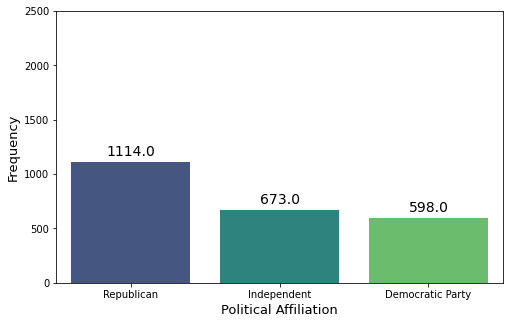

In [48]:
value_counts = df['Official Party'].value_counts()
target_counts = pd.DataFrame({'Official Party': list(value_counts.index), 'value_count': value_counts})
plt.figure(figsize=(8,5))
g = sns.barplot(x='Official Party', y='value_count', data=target_counts, capsize=0.3, palette='viridis')
g.set_xlabel("Political Affiliation", fontsize=13)
g.set_ylabel("Frequency", fontsize=13)
g.set_yticks([0, 500, 1000, 1500, 2000, 2500])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

In [49]:
target_counts['value_count'] = target_counts['value_count'] / df.shape[0]

target_counts

,Official Party,value_count
Republican,Republican,0.467086
Independent,Independent,0.282180
Democratic Party,Democratic Party,0.250734


In [50]:
df['Race'] = df['Race'].str.replace('Hispanic or Latino', 'Latino')
df['Race'] = df['Race'].str.replace('Black or African American', 'Black')
df['Race'] = df['Race'].str.replace('Asian American or Pacific Islander', 'Asian')
df['Race'] = df['Race'].str.replace('American Indian or Alaska Native', 'Indigeneous')

### Race of Sheriff

We also see that sheriffs are overwhelmingly white. Around 91% are white, while the rest make up just 9%.

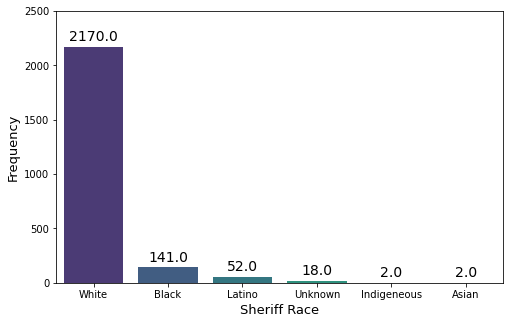

In [51]:
value_counts = df['Race'].value_counts()
target_counts = pd.DataFrame({'Race': list(value_counts.index), 'value_count': value_counts})
plt.figure(figsize=(8,5))
g = sns.barplot(x='Race', y='value_count', data=target_counts, capsize=0.3, palette='viridis')
g.set_xlabel("Sheriff Race", fontsize=13)
g.set_ylabel("Frequency", fontsize=13)
g.set_yticks([0, 500, 1000, 1500, 2000, 2500])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

In [52]:
target_counts['value_count'] = target_counts['value_count'] / df.shape[0]

target_counts

,Race,value_count
White,White,0.909853
Black,Black,0.059119
Latino,Latino,0.021803
Unknown,Unknown,0.007547
Indigeneous,Indigeneous,0.000839
Asian,Asian,0.000839


In [53]:
df = pd.concat([df, pd.get_dummies(df['Race'], drop_first=True)], axis=1)

In [54]:
df = pd.concat([df, pd.get_dummies(df['Official Party'], drop_first=True)], axis=1)

In [55]:
df['Gender'].value_counts()

Male       2257
Female       64
male         42
Unknown      15
MALE          5
female        2
Name: Gender, dtype: int64

In [56]:
gender_dict = {'male': 'Male', 'MALE': 'Male', 'female': 'Female'}
def change_gender(x):
    if x not in gender_dict.keys():
        return x
    else: 
        return gender_dict[x]

In [57]:
df['Gender'] = df['Gender'].apply(change_gender)

In [58]:
df = df.loc[(df['Gender'] == 'Female') | (df['Gender'] == 'Male')]

In [59]:
df = pd.concat([df, pd.get_dummies(df['Gender'], drop_first=True)], axis=1)

### Gender of Sheriff

We also see that the majority of sheriffs are men. Sheriffs are 97% male and only 3% female.

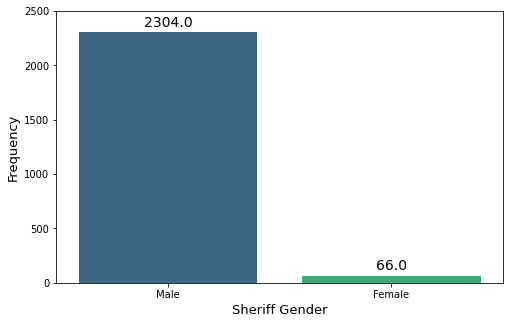

In [60]:
value_counts = df['Gender'].value_counts()
target_counts = pd.DataFrame({'Gender': list(value_counts.index), 'value_count': value_counts})
plt.figure(figsize=(8,5))
g = sns.barplot(x='Gender', y='value_count', data=target_counts, capsize=0.3, palette='viridis')
g.set_xlabel("Sheriff Gender", fontsize=13)
g.set_ylabel("Frequency", fontsize=13)
g.set_yticks([0, 500, 1000, 1500, 2000, 2500])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

In [61]:
target_counts['value_count'] = target_counts['value_count'] / df.shape[0]
target_counts

,Gender,value_count
Male,Male,0.972152
Female,Female,0.027848


In [62]:
df.head()

,RDIndex2019,State,Office Level,OCDID,Electoral District,Urban/ Rural,Office Name,Official Name,Official Party,Party Roll Up,White/Non-White,Race,Gender,Unknown?,Census 2010 Population,Native %,White %,Black %,Hispanic %,% Asian,Multi %,Other %,Total Nonwhite %,Total,county_state,tag,Black,Indigeneous,Latino,Unknown,White,Independent,Republican,Male
0,EOrd9846,CA,administrativeArea2,ocd-division/country:us/state:ca/county:los_an...,Los Angeles County,Urban,Sheriff,Alex Villanueva,Independent,Independent,Non-White,Latino,Male,NaN,9818605,0.0019234911680427107,0.27787256947397315,0.08301444044240501,0.47744959696413086,0.1373041282341025,0.019852209147837193,0.0025835645695086013,0.7221274305260268,1,"Los Angeles County, CA",Yes,0,0,1,0,0,1,0,1
1,EOrd12608,IL,administrativeArea2,ocd-division/country:us/state:il/county:cook,Cook County,Urban,Sheriff,Thomas Dart,Independent,Unknown,White,White,Male,NaN,5194675,0.0012863172383257855,0.43859490728486383,0.24366837193857172,0.23962269054368174,0.06158460346412432,0.013751004634553653,0.001492104895878953,0.5614050927151362,1,"Cook County, IL",Yes,0,0,0,0,1,1,0,1
2,EOrd24541,TX,administrativeArea2,ocd-division/country:us/state:tx/county:harris,Harris County,Urban,Sheriff,Ed Gonzalez,Democratic Party,Democratic Party,Non-White,Latino,Male,NaN,4092459,0.001991467721484809,0.3297885207890904,0.18430435100266124,0.40844392087984266,0.06160428241309198,0.011933656513113509,0.0019338006807154329,0.6702114792109097,1,"Harris County, TX",Yes,0,0,1,0,0,0,0,1
3,EOrd9663,AZ,administrativeArea2,ocd-division/country:us/state:az/county:maricopa,Maricopa County,Urban,Sheriff,Paul Penzone,Democratic Party,Democratic Party,White,White,Male,NaN,3817117,0.015522709940512696,0.5868447312461211,0.04649844372074526,0.2957051093796706,0.03537329350921127,0.018612738357247107,0.001442973846491999,0.4131552687538789,1,"Maricopa County, AZ",Yes,0,0,0,0,1,0,0,1
4,EOrd9847,CA,administrativeArea2,ocd-division/country:us/state:ca/county:san_diego,San Diego County,Urban,Sheriff,William Gore,Independent,Independent,White,White,Male,NaN,3095313,0.004554628239535065,0.48461884145480605,0.047361930764352425,0.3202739109098175,0.11034812957526428,0.030673150017461886,0.0021694090387628004,0.515381158545194,1,"San Diego County, CA",Yes,0,0,0,0,1,1,0,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 3059
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   RDIndex2019             2370 non-null   object
 1   State                   2370 non-null   object
 2   Office Level            2370 non-null   object
 3   OCDID                   2370 non-null   object
 4   Electoral District      2370 non-null   object
 5   Urban/ Rural            75 non-null     object
 6   Office Name             2370 non-null   object
 7   Official Name           2370 non-null   object
 8   Official Party          2370 non-null   object
 9   Party Roll Up           2370 non-null   object
 10  White/Non-White         2370 non-null   object
 11  Race                    2370 non-null   object
 12  Gender                  2370 non-null   object
 13  Unknown?                4 non-null      object
 14  Census 2010 Population  2370 non-null   object
 15  Nati

In [64]:
df = df.drop(columns=['RDIndex2019', 'Office Level', 'OCDID', 'Electoral District', 'Urban/ Rural', 'Party Roll Up',
             'White/Non-White', 'Unknown?', 'Census 2010 Population', 'Native %', 'White %', 'Black %', 
             'Hispanic %', '% Asian', 'Multi %', 'Other %', 'Total Nonwhite %', 'Total', 'tag'], axis=1)

In [65]:
# df = df.replace(['^\d.'], '', regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 3059
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           2370 non-null   object
 1   Office Name     2370 non-null   object
 2   Official Name   2370 non-null   object
 3   Official Party  2370 non-null   object
 4   Race            2370 non-null   object
 5   Gender          2370 non-null   object
 6   county_state    2370 non-null   object
 7   Black           2370 non-null   uint8 
 8   Indigeneous     2370 non-null   uint8 
 9   Latino          2370 non-null   uint8 
 10  Unknown         2370 non-null   uint8 
 11  White           2370 non-null   uint8 
 12  Independent     2370 non-null   uint8 
 13  Republican      2370 non-null   uint8 
 14  Male            2370 non-null   uint8 
dtypes: object(7), uint8(8)
memory usage: 166.6+ KB


## Feature selection

There are so many demographic features in the census dataset. Before looking at correlation coefficients, I wanted to standardize some of the data by dividing by population or households, depending on the feature. I chose data that made sense when thinking about the most defining characteristics of people in the USA: age, income, race, education, housing status, and family structure. 

Since census data contains a milieu of occupational data, I narrowed that down to simply the armed forces and the unemployed.

I left in the Gini index, which shows the degree of income inequality. A higher index number indicates a higher degree of income inequality.

In [67]:
mean_rent = df2['median_rent'].mean()
mean_age = df2['median_age'].mean()
mean_income = df2['median_income'].mean()
df2['white_pct'] = df2['white_pop'] / df2['total_pop']
df2['black_pct'] = df2['black_pop'] / df2['total_pop']
df2['asian_pct'] = df2['asian_pop'] / df2['total_pop']
df2['hispanic_pct'] = df2['hispanic_pop'] / df2['total_pop']
df2['amerindian_pct'] = df2['amerindian_pop'] / df2['total_pop']
df2['noncitizen_pct'] = df2['not_us_citizen_pop'] / df2['total_pop']
df2['mean_inc_pct'] = df2['median_income'] / mean_income
df2['mean_age_pct'] = df2['median_age'] / mean_age
df2['mean_rent_pct'] = df2['median_rent'] / mean_rent
df2['owner_pct'] = df2['owner_occupied_housing_units'] / df2['housing_units']
df2['poverty_pct'] = df2['poverty'] / df2['total_pop']
df2['vacancy_pct'] = df2['vacant_housing_units'] / df2['housing_units']
df2['nonfamily_pct'] = df2['nonfamily_households'] / df2['housing_units']
df2['mobile_homes_pct'] = df2['mobile_homes'] / df2['housing_units']
df2['armed_forces_pct'] = df2['armed_forces'] / df2['total_pop']
df2['unemployed_pct'] = (df2['pop_in_labor_force'] - df2['employed_pop']) / df2['pop_in_labor_force']
df2['no_degree_pct'] = (df2['less_than_high_school_graduate']+
                        df2['high_school_diploma']+df2['high_school_including_ged']+
                        df2['less_one_year_college']+df2['one_year_more_college']) / df2['total_pop']
education = pd.DataFrame(df2.groupby(['State', 'county_state'])['no_degree_pct'].mean().reset_index())

There are all sorts of differences to consider when it comes to the individual features. For example, the following dataframe is showing the percentage of people with college degrees, broken down by county. We see that one county in Georgia has a full population with no college degrees, while Arlington County, Virginia, has just 20% of its population not holding a college degree. 

<blockquote>Low-income, college-educated 20-somethings, many of whom live in urban areas, are voting more like rich, college-educated people who tend to live in the inner suburbs that are moving left.

Derek Thompson, <a href="https://www.theatlantic.com/ideas/archive/2020/11/2020-election-results-prove-density-destiny/617027/" title=”Atlantic”><i>The Atlantic</i></a>



</blockquote>
I chose features such as these that show a significant range. This will help to separate the data for visualization and then the algorithm.

In [68]:
education.sort_values('no_degree_pct', ascending=False)

,State,county_state,no_degree_pct
517,GA,"Taliaferro County, GA",1.000000
3068,WV,"Calhoun County, WV",0.949432
3097,WV,"Pendleton County, WV",0.947137
1543,MS,"Issaquena County, MS",0.945783
2102,OH,"Noble County, OH",0.937409
...,...,...,...
2932,VA,"Williamsburg city, VA",0.257303
682,ID,"Madison County, ID",0.251001
1946,NM,"Los Alamos County, NM",0.239050
2811,VA,"Arlington County, VA",0.216701


In [69]:
df5 = df2[['county_state', 'white_pct', 'black_pct', 'hispanic_pct', 'asian_pct',
           'amerindian_pct', 'mean_inc_pct', 'mean_age_pct', 'noncitizen_pct',
           'poverty_pct', 'vacancy_pct', 'nonfamily_pct', 'mobile_homes_pct', 
           'unemployed_pct', 'no_degree_pct', 'owner_pct', 'gini_index', 
           'armed_forces_pct']]

In [70]:
df5.columns

Index(['county_state', 'white_pct', 'black_pct', 'hispanic_pct', 'asian_pct',
       'amerindian_pct', 'mean_inc_pct', 'mean_age_pct', 'noncitizen_pct',
       'poverty_pct', 'vacancy_pct', 'nonfamily_pct', 'mobile_homes_pct',
       'unemployed_pct', 'no_degree_pct', 'owner_pct', 'gini_index',
       'armed_forces_pct'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 3059
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           2370 non-null   object
 1   Office Name     2370 non-null   object
 2   Official Name   2370 non-null   object
 3   Official Party  2370 non-null   object
 4   Race            2370 non-null   object
 5   Gender          2370 non-null   object
 6   county_state    2370 non-null   object
 7   Black           2370 non-null   uint8 
 8   Indigeneous     2370 non-null   uint8 
 9   Latino          2370 non-null   uint8 
 10  Unknown         2370 non-null   uint8 
 11  White           2370 non-null   uint8 
 12  Independent     2370 non-null   uint8 
 13  Republican      2370 non-null   uint8 
 14  Male            2370 non-null   uint8 
dtypes: object(7), uint8(8)
memory usage: 166.6+ KB


In [72]:
sheriff = df.merge(df5, on='county_state')

In [73]:
sheriff.head()

,State,Office Name,Official Name,Official Party,Race,Gender,county_state,Black,Indigeneous,Latino,Unknown,White,Independent,Republican,Male,white_pct,black_pct,hispanic_pct,asian_pct,amerindian_pct,mean_inc_pct,mean_age_pct,noncitizen_pct,poverty_pct,vacancy_pct,nonfamily_pct,mobile_homes_pct,unemployed_pct,no_degree_pct,owner_pct,gini_index,armed_forces_pct
0,CA,Sheriff,Alex Villanueva,Independent,Latino,Male,"Los Angeles County, CA",0,0,1,0,0,1,0,1,0.263323,0.078778,0.484609,0.143747,0.002011,1.245479,0.876753,0.165662,0.157452,0.061916,0.311789,0.015969,0.068969,0.543549,0.429765,0.5022,0.000352
1,IL,Sheriff,Thomas Dart,Independent,White,Male,"Cook County, IL",0,0,0,0,1,1,0,1,0.424551,0.232345,0.251589,0.071372,0.000997,1.203550,0.886441,0.105125,0.148940,0.102963,0.356089,0.007039,0.078156,0.522418,0.510310,0.5069,0.000245
2,TX,Sheriff,Ed Gonzalez,Democratic Party,Latino,Male,"Harris County, TX",0,0,1,0,0,0,0,1,0.300712,0.185769,0.425628,0.069073,0.001770,1.165905,0.806516,0.167816,0.160586,0.090459,0.288278,0.025396,0.061143,0.522482,0.497219,0.4978,0.000344
3,AZ,Sheriff,Paul Penzone,Democratic Party,White,Male,"Maricopa County, AZ",0,0,0,0,1,0,0,1,0.556870,0.051839,0.308208,0.040643,0.015857,1.194207,0.874331,0.089167,0.145395,0.115400,0.305046,0.050870,0.057361,0.519820,0.542773,0.4666,0.001152
4,CA,Sheriff,William Gore,Independent,White,Male,"San Diego County, CA",0,0,0,0,1,1,0,1,0.458812,0.047092,0.335144,0.115760,0.003719,1.451033,0.862222,0.110493,0.122074,0.071296,0.303115,0.034925,0.103288,0.470540,0.492902,0.4630,0.022191


## Correlation

In [74]:
corr = sheriff.drop(columns=['Black', 'Latino', 'White', 'Indigeneous', 'Male', 'Independent',
                     'Republican']).corr()
mask = np.zeros_like(corr)

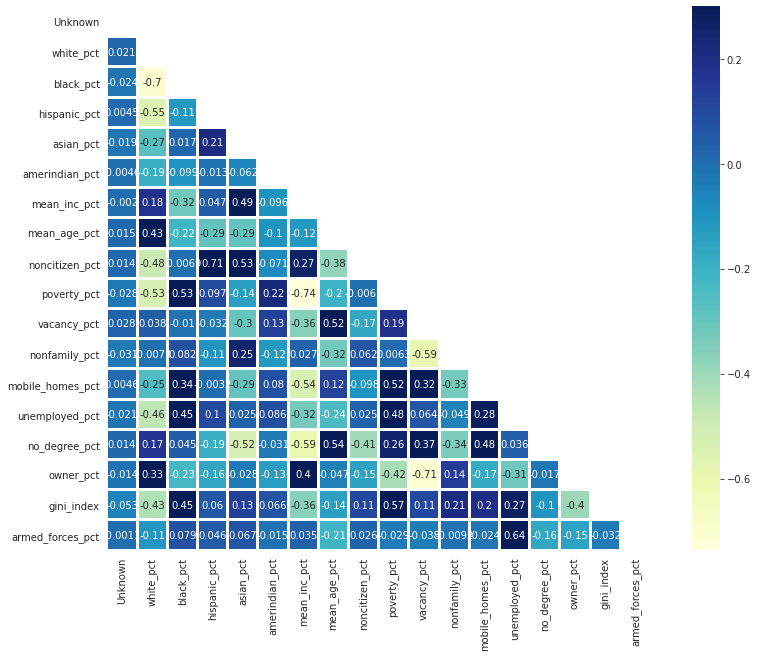

In [75]:
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, linewidths=2, mask=mask, vmax=.3, cmap='YlGnBu',
                     annot=True, square=True)

With the correlation matrix we see that:
* counties with high black populations are more likely to have black sheriffs;
* counties that have a high poverty rate also have a high Gini index rating, which makes sense, because there will be more income disparity;
* counties that have people with less college degrees also have more mobile homes;
* counties with high housing vacancy also have older populations;
* counties with high white populations have older populations;
* counties with high black populations have more poverty;
* counties with high hispanic populations have more noncitizens.

In [76]:
X = sheriff.iloc[:, 7:]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std.shape

(2368, 25)

## Drawing the results

In [77]:
k_means = KMeans(n_clusters=2, random_state=123)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

### PCA

Here we start to draw the datapoints after they are scaled. The graph below shows PCA-transformed variables. This is using K-means to determine two clusters, but because the shape is a large blob, there is no good way to distinguish the clusters. PCA does a poor job of showing any results here.

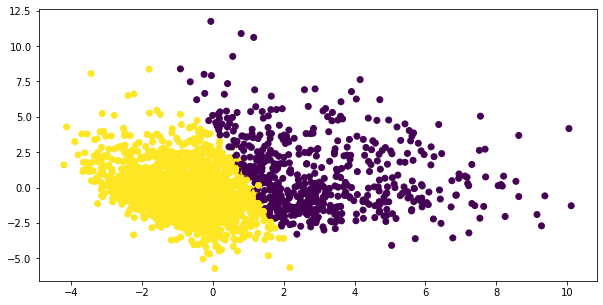

In [78]:
# Plot the solution.
plt.figure(figsize=(10,5))

# do pca for drawing (graph)
pca = PCA(n_components=2).fit_transform(X_std)

plt.scatter(pca[:,0], pca[:,1], c=y_pred)
plt.show()

### UMAP

Here we are using UMAP to transform the variables. We see three distinct shapes with some outliers.

In [79]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation',
                        random_state=123).fit_transform(X)

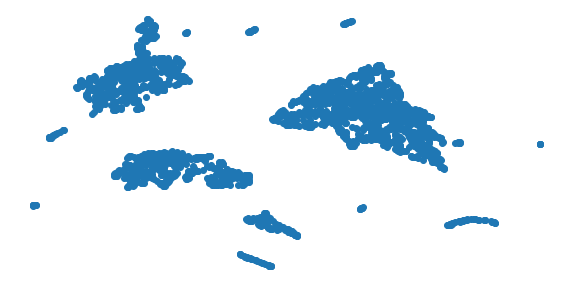

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### T-SNE

Here we are using T-SNE transformation. Again we see three distinct shapes with some outliers.

In [81]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=123)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2368 samples in 0.007s...
[t-SNE] Computed neighbors for 2368 samples in 0.399s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2368
[t-SNE] Computed conditional probabilities for sample 2000 / 2368
[t-SNE] Computed conditional probabilities for sample 2368 / 2368
[t-SNE] Mean sigma: 0.109931
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.149277
[t-SNE] KL divergence after 300 iterations: 1.089131


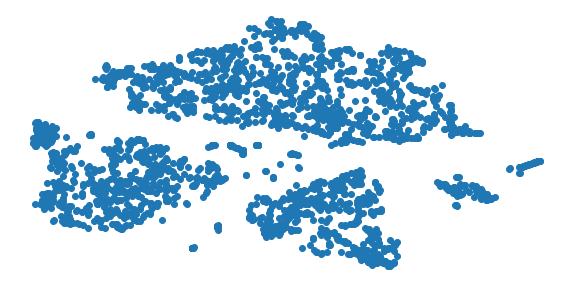

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## K-Means Clustering

To try to categorize these clusters using an algorithm, I am using K-means. Here we see the algorithm picking up all three clusters with the purple and green colors. We know they are three distinct shapes, but the algorithm is not categorizing them as such. The yellow appears to be outliers.

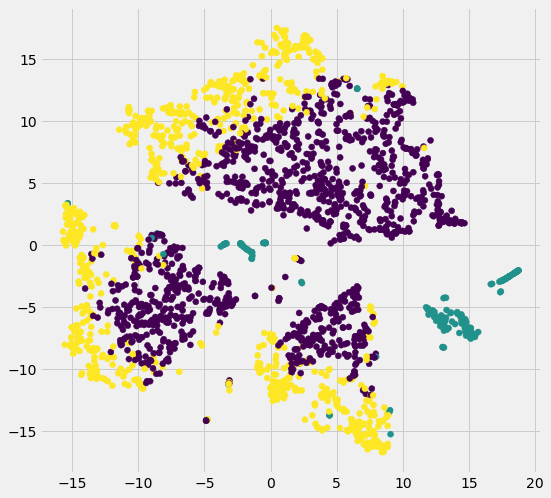

In [83]:

y = sheriff['Official Party']

k_means = KMeans(n_clusters=3, random_state=123)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_pred)
plt.show()

In [84]:
tsne_df = pd.DataFrame(columns=["component_1", "component_2"])
tsne_df["component_1"] = tsne_results[:, 0]
tsne_df["component_2"] = tsne_results[:, 1]
tsne_df["kmeans_labels"] = k_means.labels_
tsne_df["true_labels"] = y

Text(0.5, 1.0, 'Clustering results from Predicted Sheriff Party Classes')

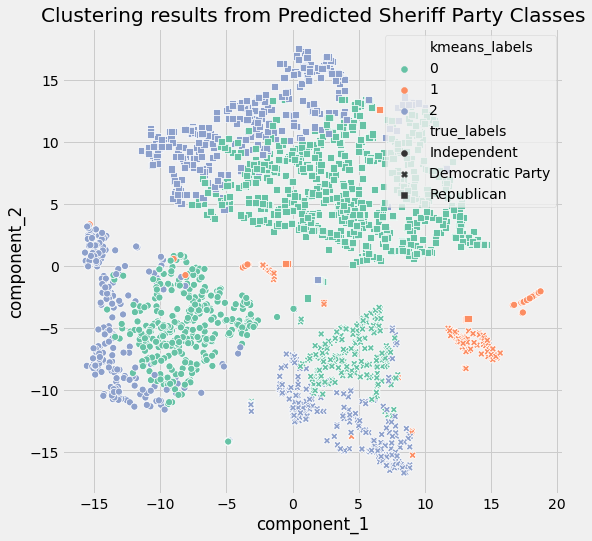

In [85]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
  "component_1",
  "component_2",
  s=50,
  data=tsne_df,
  hue="kmeans_labels",
  style="true_labels",
  palette="Set2",
  )

scat.set_title(
"Clustering results from Predicted Sheriff Party Classes")

We see the same when we try K-means on the UMAP results. The colors are not matching up with the classes in the data.

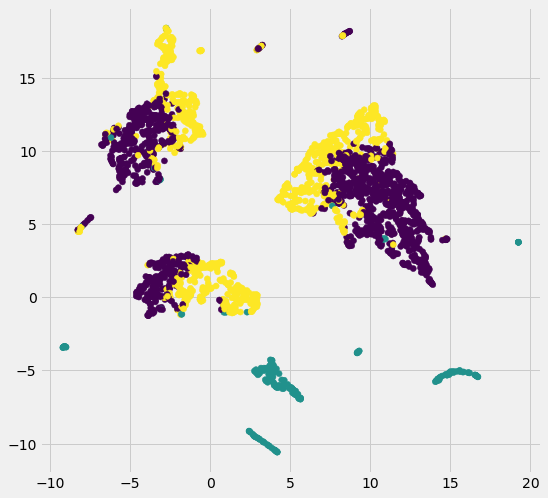

In [86]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=y_pred)
plt.show()

In [87]:
print("The silhouette score of the K-Means solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

print("The adjusted rand-index score of the K-Means solution: {}".format(metrics.adjusted_rand_score(y, y_pred)))

The silhouette score of the K-Means solution: 0.1491788747472263
The adjusted rand-index score of the K-Means solution: 0.0632480796488733


In [88]:
pd.crosstab(y, y_pred)

col_0,0,1,2
Official Party,,,
Democratic Party,216,130,249
Independent,354,64,247
Republican,726,18,364


### Interpreting Score of K-Means

We don't have labels for y here, so we can only run the silhouette score. This number isn't giving results yet, since we have nothing to compare it to, but this will be usefull for comparing when we don't have a ground truth (y).

It could be that the algorithm is not finding the ideal amount of clusters. To help, we want to find the knee in a graph showing the sum of squared errors and the number of clusters where the SSE significantly decreases.

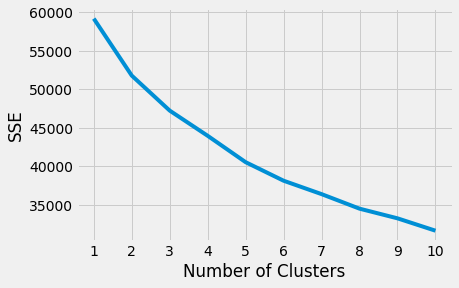

In [89]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 123,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X_std)
  sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The graph is not helpful, since there is no inflection point in the line.

In [90]:
sheriff = sheriff.drop(columns=['State', 'Office Name', 'Official Name', 'Race', 'Gender',
                     'county_state'])

## DBScan

This density-based algorithm searches for datapoints nearby with an epsilon (distance) parameter. It can work better than K-means, which splits the datapoints into a predetermined set of clusters using averages.

In [91]:
X = sheriff.loc[:, ~sheriff.columns.isin(['Official Party'])]

features = X.columns

X_std = StandardScaler().fit_transform(X)
y = sheriff['Official Party']

# change Official Party to y, run crosstab, y cannot be part of the algorithm

print(X.shape, y.shape)

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=10)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

(2368, 25) (2368,)


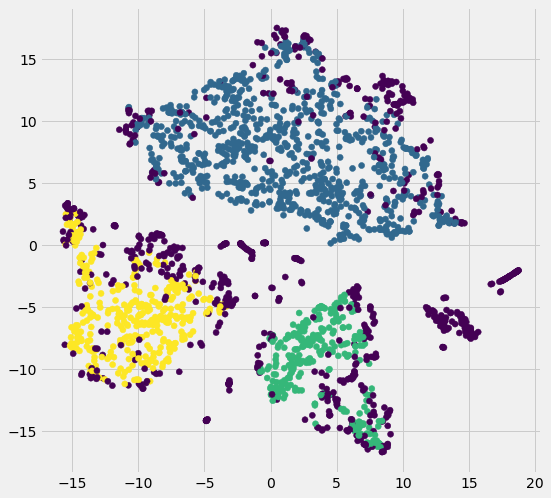

In [92]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)

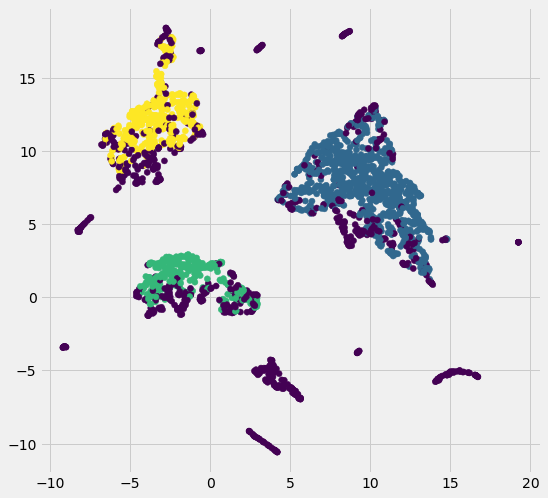

In [93]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=clusters);

In [94]:
tsne_df = pd.DataFrame(columns=["component_1", "component_2"])
tsne_df["component_1"] = tsne_results[:, 0]
tsne_df["component_2"] = tsne_results[:, 1]
tsne_df["dbscan_labels"] = clusters
tsne_df["true_labels"] = y

Text(0.5, 1.0, 'Clustering results from Predicted Sheriff Party Classes')

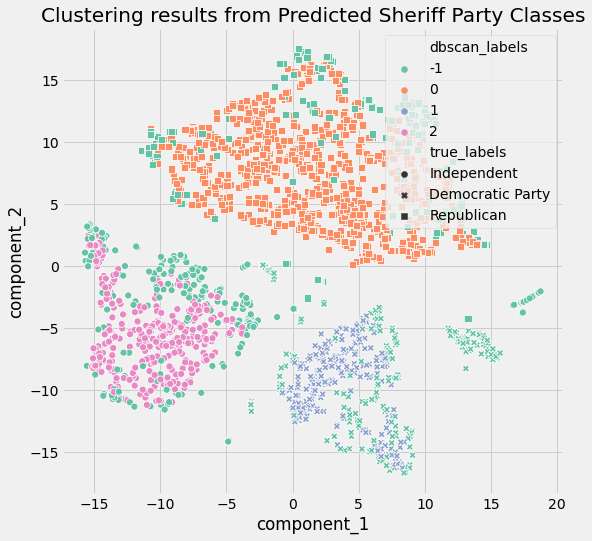

In [95]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
  "component_1",
  "component_2",
  s=50,
  data=tsne_df,
  hue="dbscan_labels",
  style="true_labels",
  palette="Set2",
  )

scat.set_title(
"Clustering results from Predicted Sheriff Party Classes")

The DBSCAN is sensitive to outliers, which it identifies in purple. The three main clusters are shown in yellow, blue and green. These represent what we know are distinct demographic areas in the US political arena. We are going to assume that these correspond to the sheriff's political affiliations (Republican, Independent, and Democrat).

What we ultimately want to know is if we can predict where a white sheriff is likely to hold office. This will be our y factor.

In [96]:
sheriff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Official Party    2368 non-null   object 
 1   Black             2368 non-null   uint8  
 2   Indigeneous       2368 non-null   uint8  
 3   Latino            2368 non-null   uint8  
 4   Unknown           2368 non-null   uint8  
 5   White             2368 non-null   uint8  
 6   Independent       2368 non-null   uint8  
 7   Republican        2368 non-null   uint8  
 8   Male              2368 non-null   uint8  
 9   white_pct         2368 non-null   float64
 10  black_pct         2368 non-null   float64
 11  hispanic_pct      2368 non-null   float64
 12  asian_pct         2368 non-null   float64
 13  amerindian_pct    2368 non-null   float64
 14  mean_inc_pct      2368 non-null   float64
 15  mean_age_pct      2368 non-null   float64
 16  noncitizen_pct    2368 non-null   float64


In [98]:
sheriff['clusters'] = clusters
sheriff['clusters'].unique()

array([-1,  0,  1,  2])

In [99]:
df['Official Party'].unique()

array(['Independent', 'Democratic Party', 'Republican'], dtype=object)

### Y - Crosstab

We are running what is similar to a confusion matrix with supervised learning. This contingency table will tell us how many fall into the outlier category (-1), the Democratic Party (1), Independent (2), and Republican (0).

It never misclassifies between the parties, it only classifies them as outliers.

It looks like the most inaccurate prediction is the Democratic party, with 289 accurately placed but 306 categorized as outliers.

In [100]:
# clusters = np.array(['Democrat' if x == 2 else 'Republican' if x==0 else 'Independent' for x in clusters])
pd.crosstab(y, clusters)

col_0,-1,0,1,2
Official Party,,,,
Democratic Party,306,0,289,0
Independent,290,0,0,375
Republican,241,867,0,0


In [101]:
metrics.adjusted_rand_score(y, clusters)

0.4867411296451129

### Analyzing Clusters

We want to see what the means of the clusters are for each feature. The difference between the means, if significant, can tell us if the y was a good choice, or if we should choose again.


* __[white_pct]__ - for counties with the ~87% white populations, the sheriff will tend to be Republican. For those that are ~82% white, the sheriff tends to be Democrat. For counties that are ~85% white, they will tend to be Independent.

* __[black_pct]__ - counties that have high black populations (~10%) will have a Democrat sheriff. A black population of ~6% are likely to have an Independent sheriff, and a black population of ~4% will have a Republican sheriff.   

* __[hispanic_pct]__ - the counties with higher Hispanic populations tend to have a Republican sheriff, followed by Independent and Democrat.

* __[amerindian_pct]__ - the counties with the highest Amerindian population tend to have Independent sheriffs.

* __[asian_pct]__ - the counties with higher Asian populations tend to vote for more Independent sheriffs. 

* __[mean_inc_pct]__ - Mean income is highest in counties with Independent sheriffs with ~3% over average, second in counties with Republican sheriffs with ~2% over average, and third in Democratic counties with ~8% under the average.

* __[mean_age_pct]__ - There is a similar pattern across income and age. The highest age seem to be Independent counties, followed by Republican and then Democratic counties. It is interesting to note that all of these counties have ages higher than the mean, while the outliers are younger counties.

* __[vacancy_pct]__ - When homes have a high share of being empty (vacant), the sheriff tends to be Independent. 

* __[nonfamily_pct]__ - People who are not part of a family unit (ie, unmarried couples, single people) tend to have Democrat sheriffs. 

* __[mobile_homes_pct]__ - Counties with a high number of households being mobile homes or trailerhave a higher likelihood of Democrat sheriffs. 

* __[unemployed]__ - Unemployment is highest in counties with Democrat mayors.

* __[no_degree]__ - There are 3% more people without degrees in counties with Democrat sheriffs than Republican or Independent counties.

* __[owner_pct]__ - The counties with Republican sheriffs have the most home ownership, followed by Independent, then Democrat.

* [armed_forces_pct] - The highest percentage of people in the armed forces are in Republican-sheriff counties, followed by Independent, then Democrat counties.

In [102]:
pd.set_option('display.max_rows', None)
sheriff.groupby('clusters').describe().T

clusters                        -1           0           1           2
Black            count  837.000000  867.000000  289.000000  375.000000
                 mean     0.168459    0.000000    0.000000    0.000000
                 std      0.374497    0.000000    0.000000    0.000000
                 min      0.000000    0.000000    0.000000    0.000000
                 25%      0.000000    0.000000    0.000000    0.000000
                 50%      0.000000    0.000000    0.000000    0.000000
                 75%      0.000000    0.000000    0.000000    0.000000
                 max      1.000000    0.000000    0.000000    0.000000
Indigeneous      count  837.000000  867.000000  289.000000  375.000000
                 mean     0.002389    0.000000    0.000000    0.000000
                 std      0.048853    0.000000    0.000000    0.000000
                 min      0.000000    0.000000    0.000000    0.000000
                 25%      0.000000    0.000000    0.000000    0.000000
                 50%      0.000000    0.000000    0.000000    0.000000
                 75%      0.000000    0.000000    0.000000    0.000000
                 max      1.000000    0.000000    0.000000    0.000000
Latino           count  837.000000  867.000000  289.000000  375.000000
                 mean     0.060932    0.000000    0.000000    0.000000
                 std      0.239348    0.000000    0.000000    0.000000
                 min      0.000000    0.000000    0.000000    0.000000
                 25%      0.000000    0.000000    0.000000    0.000000
                 50%      0.000000    0.000000    0.000000    0.000000
                 75%      0.000000    0.000000    0.000000    0.000000
                 max      1.000000    0.000000    0.000000    0.000000
Unknown          count  837.000000  867.000000  289.000000  375.000000
                 mean     0.004779    0.000000    0.000000    0.000000
                 std      0.069006    0.000000    0.000000    0.000000
                 min      0.000000    0.000000    0.000000    0.000000
                 25%      0.000000    0.000000    0.000000    0.000000
                 50%      0.000000    0.000000    0.000000    0.000000
                 75%      0.000000    0.000000    0.000000    0.000000
                 max      1.000000    0.000000    0.000000    0.000000
White            count  837.000000  867.000000  289.000000  375.000000
                 mean     0.761051    1.000000    1.000000    1.000000
                 std      0.426696    0.000000    0.000000    0.000000
                 min      0.000000    1.000000    1.000000    1.000000
                 25%      1.000000    1.000000    1.000000    1.000000
                 50%      1.000000    1.000000    1.000000    1.000000
                 75%      1.000000    1.000000    1.000000    1.000000
                 max      1.000000    1.000000    1.000000    1.000000
Independent      count  837.000000  867.000000  289.000000  375.000000
                 mean     0.346476    0.000000    0.000000    1.000000
                 std      0.476131    0.000000    0.000000    0.000000
                 min      0.000000    0.000000    0.000000    1.000000
                 25%      0.000000    0.000000    0.000000    1.000000
                 50%      0.000000    0.000000    0.000000    1.000000
                 75%      1.000000    0.000000    0.000000    1.000000
                 max      1.000000    0.000000    0.000000    1.000000
Republican       count  837.000000  867.000000  289.000000  375.000000
                 mean     0.287933    1.000000    0.000000    0.000000
                 std      0.453070    0.000000    0.000000    0.000000
                 min      0.000000    1.000000    0.000000    0.000000
                 25%      0.000000    1.000000    0.000000    0.000000
                 50%      0.000000    1.000000    0.000000    0.000000
                 75%      1.000000    1.000000    0.000000    0.000000
                 max    

## Winsorize Features

We see with the chart below that the features have several outliers on their own. To minimize outliers I'm going to winsorize them up to 10%.

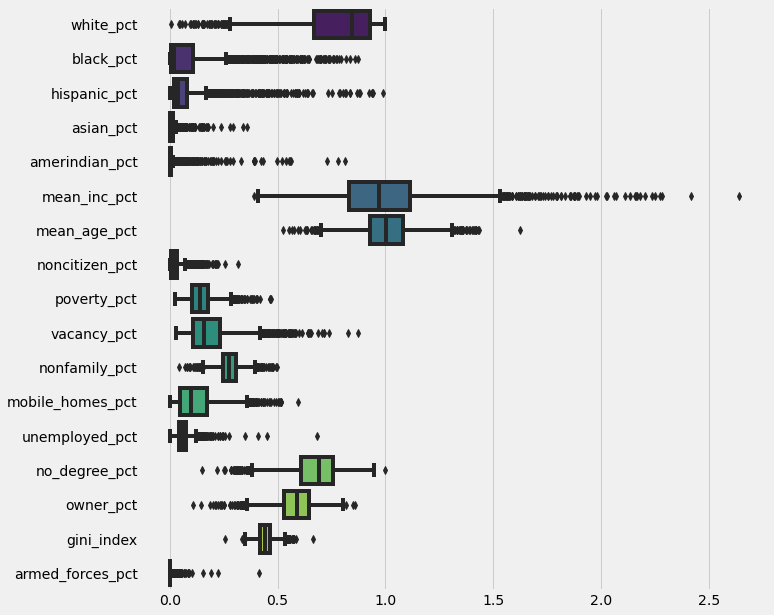

In [105]:
scaled_features = pd.DataFrame(np.row_stack([X]), columns=features).drop(columns=['Unknown',
                                                                                  'Black',
                                                                                 'Indigeneous',
                                                                                 'Latino',
                                                                                 'White',
                                                                                 'Republican',
                                                                                  'Independent',
                                                                                 'Male'])

plt.figure(figsize=(10,10))
sns.boxplot(data=scaled_features, orient='horizontal', palette='viridis');

In [106]:
sheriff['winsorized_white_pct'] = winsorize(sheriff['white_pct'], (0, 0.10))
sheriff['winsorized_black_pct'] = winsorize(sheriff['black_pct'], (0, 0.10))
sheriff['winsorized_hispanic_pct'] = winsorize(sheriff['hispanic_pct'], (0, 0.10))
sheriff['winsorized_amerindian_pct'] = winsorize(sheriff['amerindian_pct'], (0, 0.10))
sheriff['winsorized_asian_pct'] = winsorize(sheriff['asian_pct'], (0, 0.10))
sheriff['winsorized_mean_inc_pct'] = winsorize(sheriff['mean_inc_pct'], (0, 0.10))
sheriff['winsorized_mean_age_pct'] = winsorize(sheriff['mean_age_pct'], (0, 0.10))
sheriff['winsorized_noncitizen_pct'] = winsorize(sheriff['noncitizen_pct'], (0, 0.10))
sheriff['winsorized_poverty_pct'] = winsorize(sheriff['poverty_pct'], (0, 0.10))
sheriff['winsorized_vacancy_pct'] = winsorize(sheriff['vacancy_pct'], (0, 0.10))
sheriff['winsorized_mobile_homes_pct'] = winsorize(sheriff['mobile_homes_pct'], (0, 0.10))
sheriff['winsorized_unemployed_pct'] = winsorize(sheriff['unemployed_pct'], (0, 0.10))
sheriff['winsorized_no_degree_pct'] = winsorize(sheriff['no_degree_pct'], (0, 0.10))
sheriff['winsorized_gini_index'] = winsorize(sheriff['gini_index'], (0, 0.10))
sheriff['winsorized_armed_forces_pct'] = winsorize(sheriff['armed_forces_pct'], (0, 0.10))
sheriff['winsorized_owner_pct'] = winsorize(sheriff['owner_pct'], (0, 0.10))

In [107]:
winsorized_df = sheriff.drop(columns=['asian_pct', 'white_pct', 'black_pct', 'hispanic_pct', 'amerindian_pct',
                               'mean_inc_pct', 'mean_age_pct', 'noncitizen_pct', 'poverty_pct',
                               'vacancy_pct', 'mobile_homes_pct', 'unemployed_pct', 'no_degree_pct',
                               'gini_index', 'armed_forces_pct', 'nonfamily_pct', 'owner_pct'])

In [108]:
winsorized_df = winsorized_df.drop(columns=['Unknown', 'clusters'])

In [109]:
X = winsorized_df.loc[:, ~winsorized_df.columns.isin(['Official Party'])]

features = X.columns

X_std = StandardScaler().fit_transform(X)

dbscan_cluster = DBSCAN(eps=3, min_samples=10)

# Fit model
win_clusters = dbscan_cluster.fit_predict(X_std)


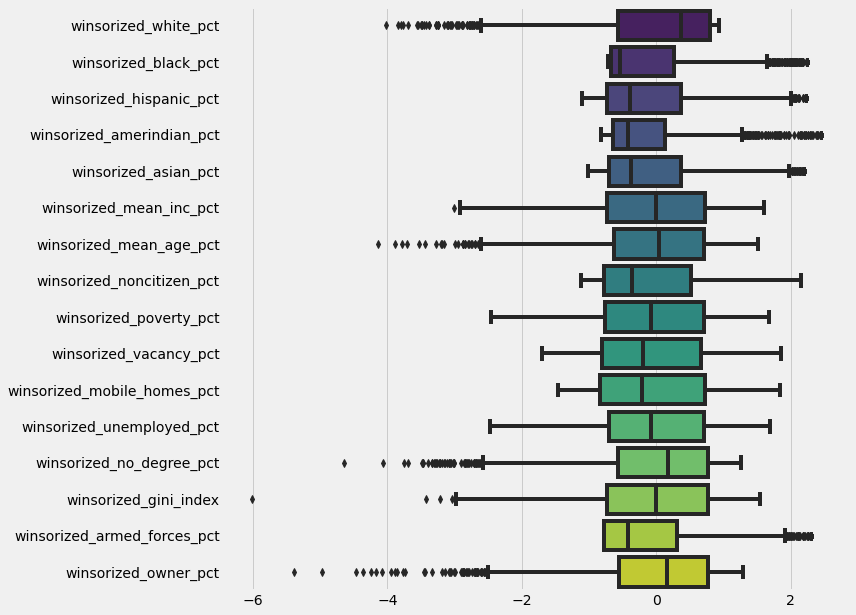

In [110]:
scaled_features = pd.DataFrame(np.row_stack([X_std]), columns=features).drop(columns=['Black', 
                                                                                      'Indigeneous',
                                                                                      'Latino', 
                                                                                      'White', 
                                                                                      'Independent',
                                                                                      'Republican',
                                                                                      'Male'])

plt.figure(figsize=(10,10))
sns.boxplot(data=scaled_features, orient='horizontal', palette='viridis');

### Y-Crosstab

The clustering for winsorized features is not working correctly. There are distinct clusters, but they don't correspond as well as the nonwinsorized features to the official party. The density-based algorithm is putting Democrat, Republican and Independent sheriffs in the same cluster.

The reason for this could be that there are so few Democrat sheriffs, for example, that the features that lead them to be separated could be occuring in the margins. Squeezing these variables into a winsorized feature could be eliminating the data points needed to determine if they belong to a Democrat sheriff versus an Independent or Republican. 

In [111]:
pd.crosstab(y, win_clusters)

col_0,-1,0,1,2
Official Party,,,,
Democratic Party,126,402,32,35
Independent,98,539,0,28
Republican,71,1037,0,0


In [112]:
winsorized_df['clusters'] = win_clusters

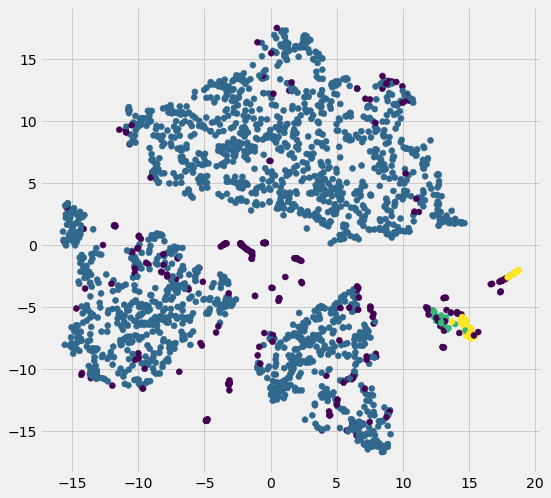

In [113]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=win_clusters);

In [114]:
pd.set_option('display.max_rows', None)
winsorized_df.groupby('clusters').describe().T

clusters                                   -1            0          1  \
Black                       count  295.000000  1978.000000  32.000000   
                            mean     0.155932     0.000000   1.000000   
                            std      0.363408     0.000000   0.000000   
                            min      0.000000     0.000000   1.000000   
                            25%      0.000000     0.000000   1.000000   
                            50%      0.000000     0.000000   1.000000   
                            75%      0.000000     0.000000   1.000000   
                            max      1.000000     0.000000   1.000000   
Indigeneous                 count  295.000000  1978.000000  32.000000   
                            mean     0.006780     0.000000   0.000000   
                            std      0.082199     0.000000   0.000000   
                            min      0.000000     0.000000   0.000000   
                            25%      0.000000     0.000000   0.000000   
                            50%      0.000000     0.000000   0.000000   
                            75%      0.000000     0.000000   0.000000   
                            max      1.000000     0.000000   0.000000   
Latino                      count  295.000000  1978.000000  32.000000   
                            mean     0.172881     0.000000   0.000000   
                            std      0.378787     0.000000   0.000000   
                            min      0.000000     0.000000   0.000000   
                            25%      0.000000     0.000000   0.000000   
                            50%      0.000000     0.000000   0.000000   
                            75%      0.000000     0.000000   0.000000   
                            max      1.000000     0.000000   0.000000   
White                       count  295.000000  1978.000000  32.000000   
                            mean     0.644068     1.000000   0.000000   
                            std      0.479608     0.000000   0.000000   
                            min      0.000000     1.000000   0.000000   
                            25%      0.000000     1.000000   0.000000   
                            50%      1.000000     1.000000   0.000000   
                            75%      1.000000     1.000000   0.000000   
                            max      1.000000     1.000000   0.000000   
Independent                 count  295.000000  1978.000000  32.000000   
                            mean     0.332203     0.272497   0.000000   
                            std      0.471804     0.445357   0.000000   
                            min      0.000000     0.000000   0.000000   
                            25%      0.000000     0.000000   0.000000   
                            50%      0.000000     0.000000   0.000000   
                            75%      1.000000     1.000000   0.000000   
                            max      1.000000     1.000000   0.000000   
Republican                  count  295.000000  1978.000000  32.000000   
                            mean     0.240678     0.524267   0.000000   
                            std      0.428222     0.499537   0.000000   
                            min      0.000000     0.000000   0.000000   
                            25%      0.000000     0.000000   0.000000   
                            50%      0.000000     1.000000   0.000000   
                            75%      0.000000     1.000000   0.000000   
                            max      1.000000     1.000000   0.000000   
Male                        count  295.000000  1978.000000  32.000000   
                            mean     0.776271     1.000000   1.000000   
                            std      0.417451     0.000000   0.000000   
                            min      0.000000     1.000000   1.000000   
                            25%      1.000000     1.000000   1.000000   
                            50%      1.000000     1.000000

In [116]:
print("The adjusted rand-index score of the K-Means solution: {}".format(metrics.adjusted_rand_score(y, y_pred)))

print("The silhouette score of the K-Means solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

print("Adjusted Rand Index of the winsorized DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, win_clusters)))

print("The silhouette score of the winsorized DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, win_clusters, metric='euclidean')))

The adjusted rand-index score of the K-Means solution: 0.0632480796488733
The silhouette score of the K-Means solution: 0.14460997927860114
Adjusted Rand Index of the DBSCAN solution: 0.4867411296451129
The silhouette score of the DBSCAN solution: 0.01937317159934826
Adjusted Rand Index of the winsorized DBSCAN solution: 0.07348290490619522
The silhouette score of the winsorized DBSCAN solution: 0.25825599856499887


The rand index is showing that DBScan (nonwinsorized) is a much better model. Since we have labels, the silhouette score is not as significant when comparing the K-Means and DBScan models.

## Heirarchical Clustering

To begin heirarchical clustering, I constructed a dendogram which would show the ideal number of clusters. All four linkages have been used. This led to too many clusters which would yield few data points.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(X_std, method='average'))
plt.show()